<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Supervised Learning Model Comparison

---

### Let us begin...

Recall the `data science process`.
   1. Define the problem.
   2. Gather the data.
   3. Explore the data.
   4. Model the data.
   5. Evaluate the model.
   6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

#### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. 

#### When predicting `e401k`, you may use the entire dataframe if you wish.

In [3]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

### Step 2: Gather the data.

##### 1. Read in the data.

In [5]:
data = pd.read_csv('401ksubs.csv')
data

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428,1,0,33,4,-1.200,0,0,3413.8310,1089
9271,0,24.546,0,1,37,3,2.000,0,0,602.5061,1369
9272,0,38.550,1,0,33,3,-13.600,0,1,1486.1020,1089
9273,0,34.410,1,0,57,3,3.550,0,0,1184.0480,3249


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs (Subject Matter Experts) might have done this!

In [10]:
data.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [14]:
data.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [15]:
# setting X and y
X = data.drop(['incsq', 'inc'], axis=1)
y = data['inc']

### Not tuning hyperparameters

In [17]:
# Trying to use pipeline 
from sklearn.pipeline import Pipeline

# setting random seed = 42
random_seed = 42
np.random.seed(random_seed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Scalling data for having data on the same scale
sc = StandardScaler()

# assigning the model and scaling for every model (no scaling for decision-tree based model)
lr = Pipeline([('scaler', sc), ('model', LinearRegression())])
knn = Pipeline([('scaler', sc), ('model', KNeighborsRegressor())])
dt = Pipeline([('model', DecisionTreeRegressor(random_state=random_seed))])
bag = Pipeline([('model', BaggingRegressor(random_state=random_seed))])
rf = Pipeline([('model', RandomForestRegressor(random_state=random_seed))])
ada = Pipeline([('scaler', sc), ('model', AdaBoostRegressor(random_state=random_seed))])

# Fitting and scoring
models = [("Linear Regression", lr), ("KNN", knn), ("Decision Tree", dt), 
          ("Bagged Trees", bag), ("Random Forest", rf), ("AdaBoost", ada)]
for name, model in models:
    model.fit(X_train, y_train)
    print(f" {name}'s Train Score: {model.score(X_train, y_train)}")
    print(f" {name}'s Test Score: {model.score(X_test, y_test)}")

 Linear Regression's Train Score: 0.3587250818434522
 Linear Regression's Test Score: 0.3518937085881092
 KNN's Train Score: 0.5357548263354897
 KNN's Test Score: 0.3212731657771932
 Decision Tree's Train Score: 0.9957211806004425
 Decision Tree's Test Score: -0.13821566004419794
 Bagged Trees's Train Score: 0.8705506189701494
 Bagged Trees's Test Score: 0.29292260490880284
 Random Forest's Train Score: 0.9026765643796065
 Random Forest's Test Score: 0.3530137516558892
 AdaBoost's Train Score: -0.04976493424754458
 AdaBoost's Test Score: -0.07278783744330841


##### 9. What is bootstrapping?

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [23]:
# dictionaries to store RMSE values
train_rmse = {}
test_rmse = {}

# Evaluate each model on both training and testing data
models = [("Linear Regression", lr), ("KNN", knn), ("Decision Tree", dt), 
          ("Bagged Trees", bag), ("Random Forest", rf), ("AdaBoost", ada)]

for name, model in models:
    # Training
    y_train_pred = model.predict(X_train)
    train_rmse[name] = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    
    # Testing
    y_test_pred = model.predict(X_test)
    test_rmse[name] = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
# Output RMSE 
print("Training RMSE:", train_rmse)
print()
print("Testing RMSE:", test_rmse)


Training RMSE: {'Linear Regression': 19.19834711302874, 'KNN': 16.334859801911115, 'Decision Tree': 1.5682080928458664, 'Bagged Trees': 8.625647413730546, 'Random Forest': 7.479118743735396, 'AdaBoost': 24.563358316684866}

Testing RMSE: {'Linear Regression': 19.757464827018527, 'KNN': 20.218810818793116, 'Decision Tree': 26.183058560026254, 'Bagged Trees': 20.63676294480875, 'Random Forest': 19.740385236151642, 'AdaBoost': 25.419383852559793}


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [27]:
data.head(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.17,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.23,0,1,35,1,154.000,1,0,3749.1130,1225


## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [29]:
data.shape

(9275, 11)

In [30]:
data[data['e401k'] != data['p401k']]
# around 12 % of the data that has people who are participating (now having the account) are not eligible for 401k

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
9,1,29.100,0,1,45,1,29.600,0,1,846.8100,2025
17,1,12.480,1,0,27,2,-10.000,0,0,155.7504,729
18,1,45.390,1,0,57,2,122.500,0,1,2060.2520,3249
40,1,58.920,1,0,49,4,19.679,0,0,3471.5660,2401
41,1,48.615,1,0,36,4,-2.700,0,0,2363.4180,1296
...,...,...,...,...,...,...,...,...,...,...,...
9233,1,31.404,1,0,48,3,0.700,0,0,986.2112,2304
9241,1,35.064,0,1,30,1,-8.100,0,0,1229.4840,900
9249,1,46.929,1,0,37,4,17.250,0,1,2202.3310,1369
9253,1,55.602,1,1,32,4,10.300,0,0,3091.5830,1024


##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [33]:
# set X and y
X = data.drop(['p401k', 'e401k'], axis=1)
y = data['e401k']

### Without tuning hyperparameters model

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed)

# Scalling data for having data on the same scale
sc = StandardScaler()

# without tuning hyperparametrs model

# assigning the model and scaling for every model (no scaling for decision-tree based model)
lr_2 = Pipeline([('scaler', sc), ('model', LogisticRegression())])
knn_2 = Pipeline([('scaler', sc), ('model', KNeighborsClassifier())])
dt_2 = Pipeline([('model', DecisionTreeClassifier(random_state=random_seed))])
bag_2 = Pipeline([('model', BaggingClassifier(random_state=random_seed))])
rf_2 = Pipeline([('model', RandomForestClassifier(random_state=random_seed))])
ada_2 = Pipeline([('scaler', sc), ('model', AdaBoostClassifier(random_state=random_seed, algorithm='SAMME'))]) #algorithm='SAMME' to solve warning

# Fitting and scoring
models = [lr_2, knn_2, dt_2, bag_2, rf_2, ada_2]
for model in models:
    model.fit(X_train, y_train)
    print(f" Train Score: {model.score(X_train, y_train)}")
    print(f" Test Score: {model.score(X_test, y_test)}")

 Train Score: 0.6569867740080506
 Test Score: 0.6545924967658473
 Train Score: 0.7515813686026452
 Test Score: 0.6399310047434239
 Train Score: 1.0
 Test Score: 0.592496765847348
 Train Score: 0.9749856239217941
 Test Score: 0.6472617507546357
 Train Score: 1.0
 Test Score: 0.6589047003018542
 Train Score: 0.6889016676250719
 Test Score: 0.6895213454075032


### KNN Model Hyperparameter Tuning

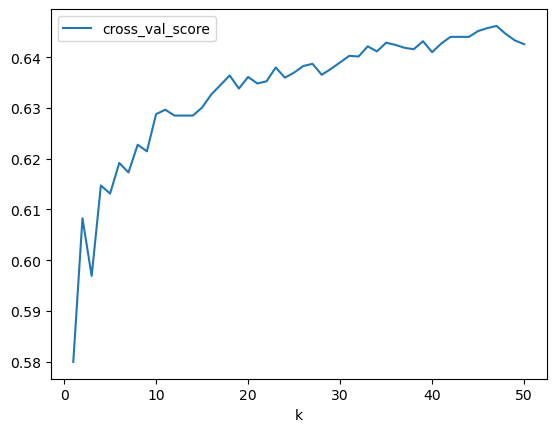

In [37]:
# KNN model
ks = range (1,51)
scores = []

for k in ks :
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model , X_train, y_train, cv=5)
    scores.append([k, cv_scores.mean()])

optimal_k = pd.DataFrame(scores, columns=['k', 'cross_val_score'])
optimal_k.plot.line(x='k', y='cross_val_score')
plt.show()

In [38]:
optimal_k[['k', 'cross_val_score']].sort_values(by=['cross_val_score', 'k' ], ascending = False ).head(1)

,k,cross_val_score
46,47,0.646203


### Decision Tree Model Hyperparameter Tuning

In [40]:
# Decision Tree model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= DecisionTreeClassifier(),
                    param_grid ={'max_depth':  [2, 3, 5, 7],
                                'min_samples_split': [5, 10, 15, 20],
                                'min_samples_leaf' :[2, 3, 4, 5, 6],
                                'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]}, 
                    cv=10, 
                    verbose=1)
                            

In [41]:
# how much time take to run
import time 

# start out time
t0 = time.time()

grid.fit(X_train, y_train)

print(f'Seconds it took our code to run = {time.time()-t0}')

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Seconds it took our code to run = 79.8434910774231


In [42]:
# What is our best decision tree?
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, min_samples_leaf=2,
                       min_samples_split=5)

### Bagging Model Hyperparameter Tuning

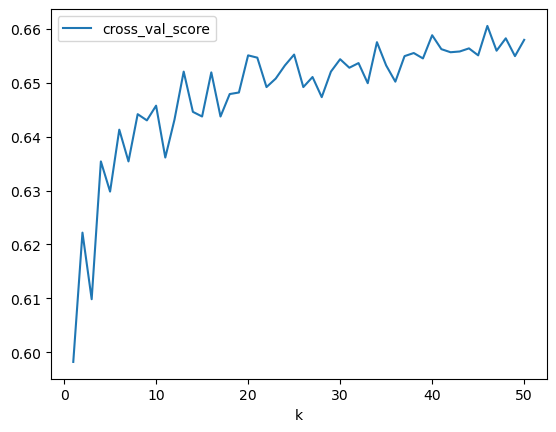

In [44]:
bag = range (1,51)
scores = []

for k in bag :
    model = BaggingClassifier(n_estimators=k)
    cv_scores = cross_val_score(model , X_train, y_train, cv=5)
    scores.append([k, cv_scores.mean()])

optimal_k = pd.DataFrame(scores, columns=['k', 'cross_val_score'])
optimal_k.plot.line(x='k', y='cross_val_score')
plt.show()

In [45]:
optimal_k[['k', 'cross_val_score']].sort_values(by=['cross_val_score', 'k' ], ascending = False ).head(1)

,k,cross_val_score
45,46,0.660581


### Random Forest Model Hyperparameter Tuning

In [47]:
grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                    param_grid ={'max_depth':  [2, 3, 5, 7],
                                'min_samples_split': [5, 10, 15, 20],
                                'min_samples_leaf' :[2, 3, 4, 5, 6],
                                'ccp_alpha' : [0.001, 0.01, 0.1]}, 
                    cv=10, 
                    verbose=1)

In [48]:
# how much time take to run
import time 

# start out time
t0 = time.time()

grid_rf.fit(X_train, y_train)

print(f'Seconds it took our code to run = {time.time()-t0}')

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Seconds it took our code to run = 1048.5953862667084


In [49]:
# what is the best hyperparameters for random forest
grid_rf.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, max_depth=7, min_samples_leaf=6,
                       min_samples_split=5)

### Adaboost Model Hyperparameter Tuning

In [56]:
# t0 = time.time()

# ada_params = {
#     'n_estimators': [50,75,100],
#     'learning_rate': [0.3, 0.8, 0.9, 1.0]}

# grid_ada = GridSearchCV(ada, param_grid=ada_params, cv=5)
# grid_ada.fit(X_train, y_train)
# print(grid_ada.best_score_)  
# print(grid_ada.best_params_) 

# print(f'How long did this all take to run: {time.time() - t0 }')


In [60]:
ada_params = {'model__n_estimators': [50, 75, 100],
    'model__learning_rate': [0.3, 0.8, 0.9, 1.0]}

grid_ada = GridSearchCV(ada, param_grid=ada_params, cv=5)
grid_ada.fit(X_train, y_train)

print(grid_ada.best_score_)  
print(grid_ada.best_params_) 

# How much time it takes?
import time
t0 = time.time()
print(f'How long did this all take to run: {time.time() - t0 }')

0.12062020154521061
{'model__learning_rate': 0.3, 'model__n_estimators': 50}
How long did this all take to run: 3.719329833984375e-05


### With tuning hyperparameters model

In [64]:
# assigning the model and scaling for every model (no scaling for decision-tree based model)
lr_2 = Pipeline([('scaler', sc), ('model', LogisticRegression(max_iter=200))])

knn_2 = Pipeline([('scaler', sc), ('model', KNeighborsClassifier(n_neighbors=47))])

dt_2 = Pipeline([('model', DecisionTreeClassifier(random_state=random_seed,ccp_alpha=0.001, max_depth=7, min_samples_leaf=2,
                       min_samples_split=5))])


rf_2 = Pipeline([('model', RandomForestClassifier(random_state=random_seed, ccp_alpha=0.001, max_depth=7, min_samples_leaf=6,
                       min_samples_split=5))])

ada_2 = Pipeline([('scaler', sc), ('model', AdaBoostClassifier(random_state=random_seed, algorithm='SAMME', learning_rate= 0.3, 
                                                               n_estimators= 50))]) #algorithm='SAMME' to solve warning

# Fitting and scoring
models = [lr_2, knn_2, dt_2, bag_2, rf_2, ada_2]
for model in models:
    model.fit(X_train, y_train)
    print(f" Train Score: {model.score(X_train, y_train)}")
    print(f" Test Score: {model.score(X_test, y_test)}")

 Train Score: 0.6569867740080506
 Test Score: 0.6545924967658473
 Train Score: 0.6778320874065555
 Test Score: 0.6649417852522639
 Train Score: 0.6945083381253594
 Test Score: 0.685640362225097
 Train Score: 0.9749856239217941
 Test Score: 0.6472617507546357
 Train Score: 0.69551466359977
 Test Score: 0.6860715825786977
 Train Score: 0.6827199539965497
 Test Score: 0.6834842604570935


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [68]:
y_train.value_counts(normalize=True)

e401k
0    0.606095
1    0.393905
Name: proportion, dtype: float64

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [74]:
# import f1_score
from sklearn.metrics import f1_score

# Dictionaries to store value 
train_f1 = {}
test_f1 = {}

models = [("Logistic Regression", lr_2), ("KNN", knn_2), ("Decision Tree", dt_2), 
          ("Bagged Trees", bag_2), ("Random Forest", rf_2), ("AdaBoost", ada_2)]

# Evaluate each model
for name, model in models:
    # Training
    y_train_pred = model.predict(X_train)
    train_f1[name] = f1_score(y_train, y_train_pred)
    
    # Testing 
    y_test_pred = model.predict(X_test)
    test_f1[name] = f1_score(y_test, y_test_pred)

# Output
print("Training F1-scores:", train_f1)
print()
print("Testing F1-scores:", test_f1)

Training F1-scores: {'Logistic Regression': 0.4824295010845987, 'KNN': 0.5003344481605351, 'Decision Tree': 0.556274796408436, 'Bagged Trees': 0.9675856929955291, 'Random Forest': 0.5583819849874896, 'AdaBoost': 0.5635752422384813}

Testing F1-scores: {'Logistic Regression': 0.47058823529411764, 'KNN': 0.4592901878914405, 'Decision Tree': 0.5412208936438011, 'Bagged Trees': 0.4842370744010088, 'Random Forest': 0.5368956743002544, 'AdaBoost': 0.5567632850241546}


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.